In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GHA import GHA
from utils import *
np.random.seed(24)

Image shape: (256, 256)
Image dtype: float32
Image size: 65536
Image min: 0.08627451
Image max: 0.9490196
Image mean: 0.53473824
Image std: 0.1787701


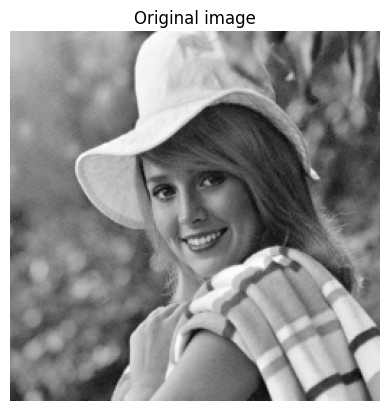

In [2]:
image = load_image('images/elaine.png')
image = image.astype(np.float32) / 255.0

print("Image shape:", image.shape)
print("Image dtype:", image.dtype)
print("Image size:", image.size)
print("Image min:", image.min())
print("Image max:", image.max())
print("Image mean:", image.mean())
print("Image std:", image.std())

plt.imshow(image, cmap='gray')
plt.title(f'Original image')
plt.axis('off')
plt.show()

In [3]:
blocks = blockify(image, 8, 8)
flattened_blocks = blocks.reshape(-1, 8*8)
print("Flattened blocks shape:", flattened_blocks.shape)
centered_blocks, mean_vector = mean_center(flattened_blocks)
#std = np.std(flattened_blocks, axis=0)
#print("std vector shape:", std.shape)
print("mean vector shape:", mean_vector.shape)
#centered_blocks /= std
#centered_blocks

Flattened blocks shape: (1024, 64)
mean vector shape: (64,)


Number of components: 8
Training in sequential mode
- Sequential training: component 1/8
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
- Sequential training: component 3/8
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
- Sequential training: component 5/8
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
- Sequential training: component 7/8
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
- Epoch 0/600
- Epoch 100/600
- Epoch 200/600
- Epoch 300/600
- Epoch 400/600
- Epoch 500/600
Checking 8 components of dimension 64

✅ All com

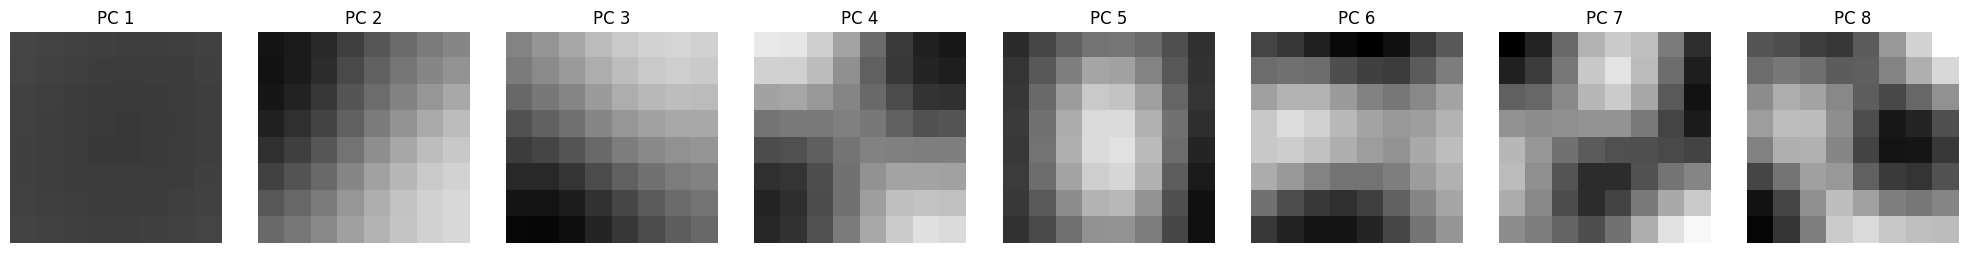

Component coefficients:


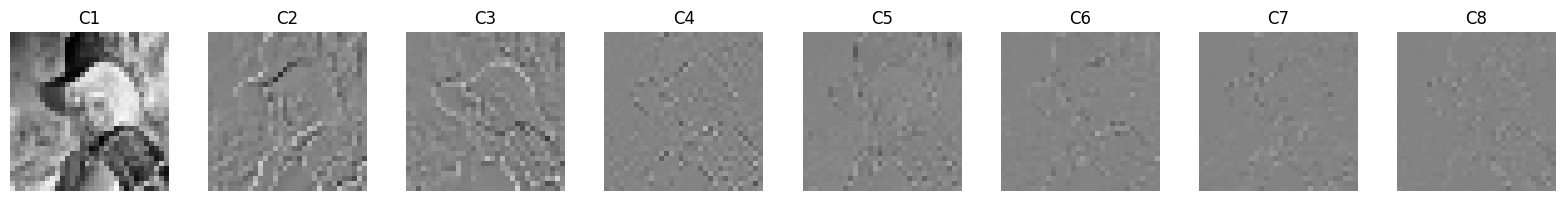

MSE: 0.0007279810218465697


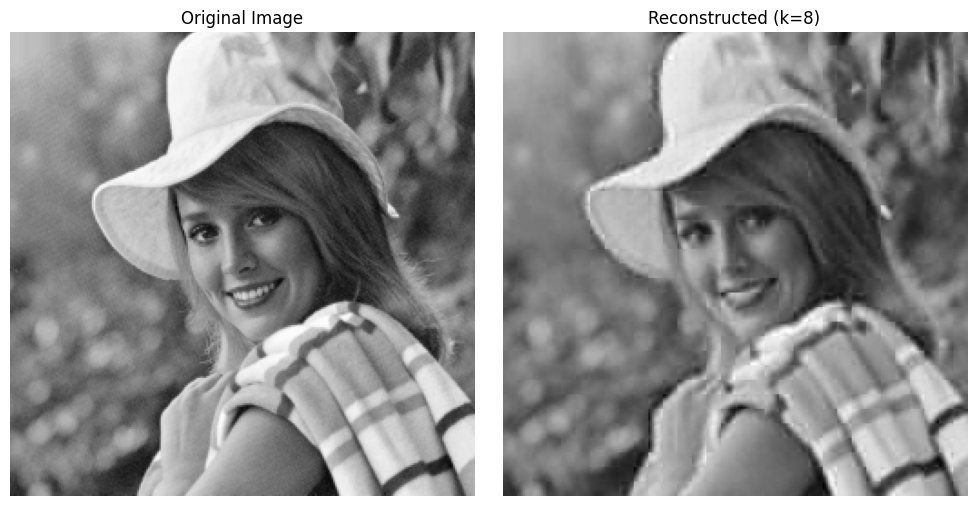

In [4]:
ks = (8,)
models = dict()

for k in ks:
    print(f"Number of components: {k}")
    
    gha = GHA(input_dim=64, num_components=k)
    if k > 16:
        print("Training in parallel mode")
        gha.train_parallel(centered_blocks, epochs=8000, lr_s=0.001, lr_f=0.0001)
    else:
        print("Training in sequential mode")
        gha.train_sequential(centered_blocks, epochs_per_component=600, lr_s=0.001, lr_f=0.0001)
    
    models[k] = gha

    components = gha.get_components()
    #if k <= 16:
    #    err = np.abs(components @ components.T - np.eye(k))
    #    print("Max error:", err.max())

    check_component_properties(components, verbose=False)
    print(f"Did the components converge to form a orthonormal basis: {np.allclose(components @ components.T, np.eye(k), atol=1e-4, rtol=1e-4)}")
    
    print("Principal components: ")
    visualize_components(components, 1, 8)
    #print("Components shape:", components.shape)

    encoded_blocks = encode_blocks(flattened_blocks, mean_vector, components)
    print("Component coefficients:")
    visualize_component_coefficients(encoded_blocks, num_components=8)
    #print(f"Encoded shape: {encoded_blocks.shape}") # (1024,k)

    reconstructed_image = reconstruct_image(encoded_blocks, mean_vector, components)

    #print("Original image dtype:", image.dtype)
    #print("Original min/max:", image.min(), image.max())
    #print("Original image shape:", image.shape)

    #print("Reconstructed dtype:", reconstructed_image.dtype)
    #print("Reconstructed min/max:", reconstructed_image.min(), reconstructed_image.max())
    #print("Reconstructed image shape:", reconstructed_image.shape)


    print(f"MSE: {np.mean((image - reconstructed_image) ** 2)}")
    show_original_vs_reconstructed(image, reconstructed_image, k)

MSE for k=1: 0.0061
MSE for k=2: 0.0039
MSE for k=3: 0.0023
MSE for k=4: 0.0017
MSE for k=5: 0.0012
MSE for k=6: 0.0010
MSE for k=7: 0.0009
MSE for k=8: 0.0007


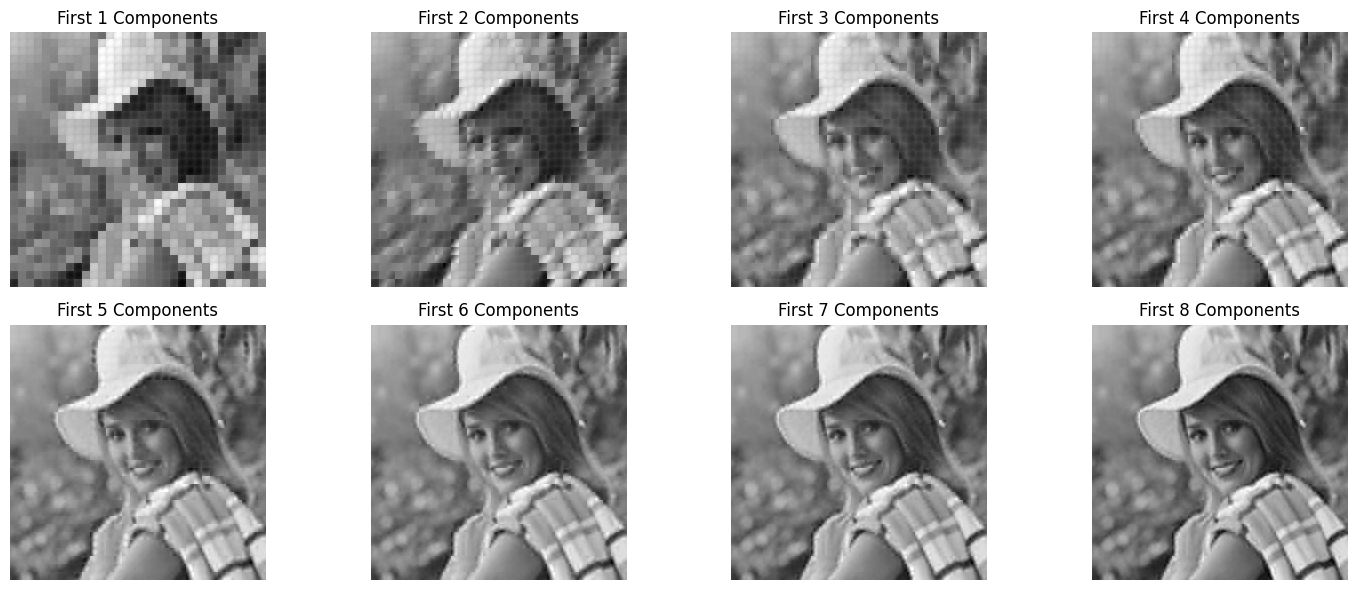

In [5]:
reconstruct_with_first_k_components(flattened_blocks, mean_vector, components, first_k_components=list(range(1, 9)), image=image)

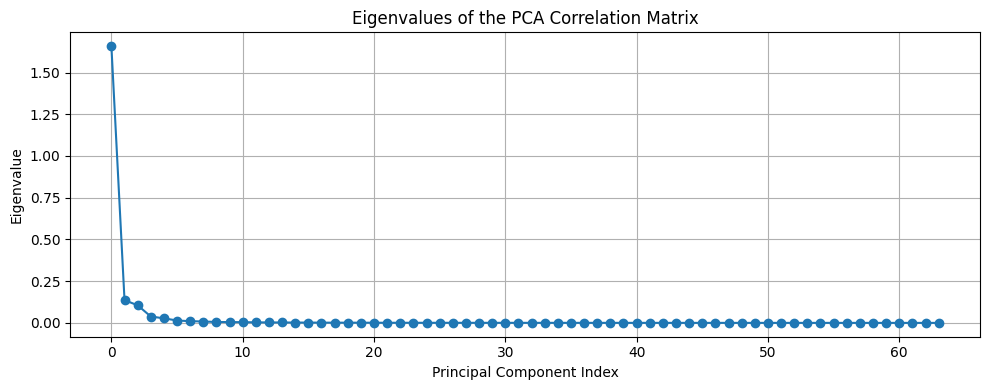

In [6]:
plot_pca_eigenvalues(centered_blocks)


(256, 256)


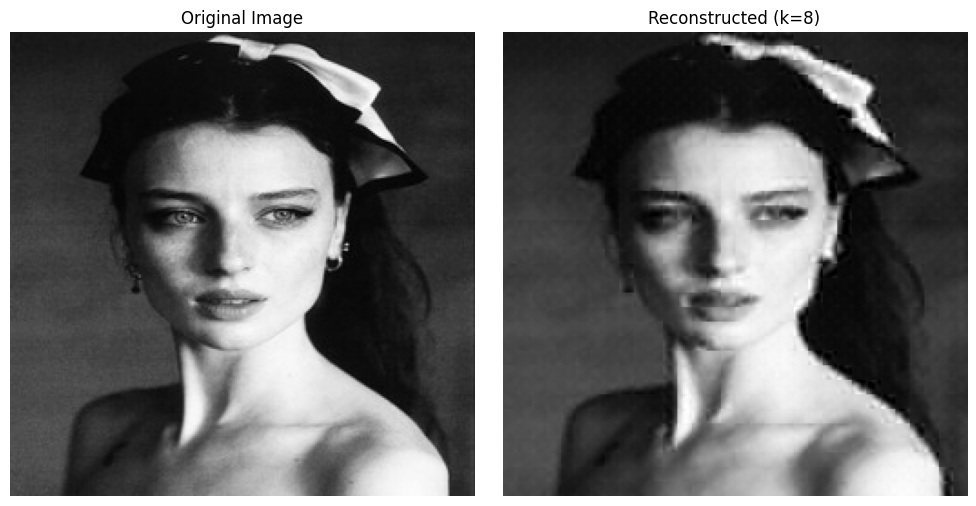

images/1.jpg MSE: 0.0009914999593951897
(256, 256)


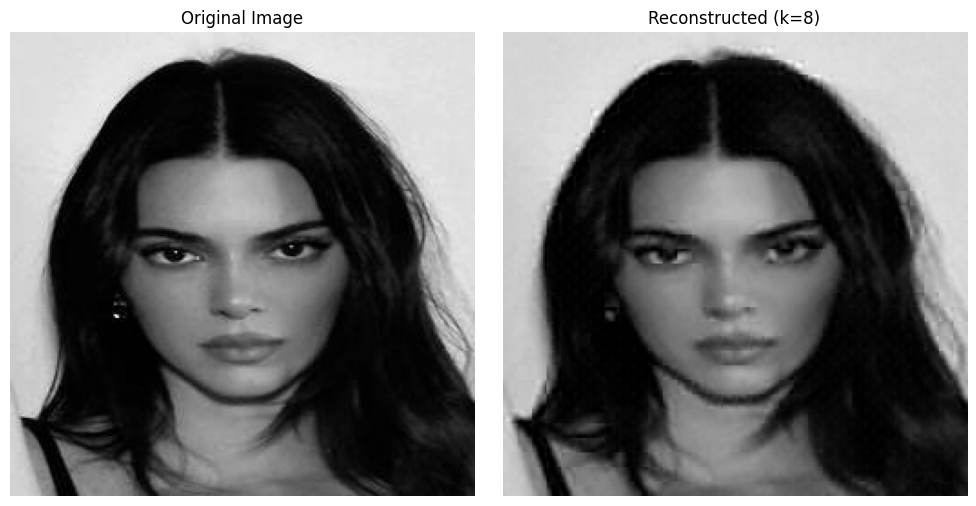

images/2.jpg MSE: 0.0005756341700853757
(256, 256)


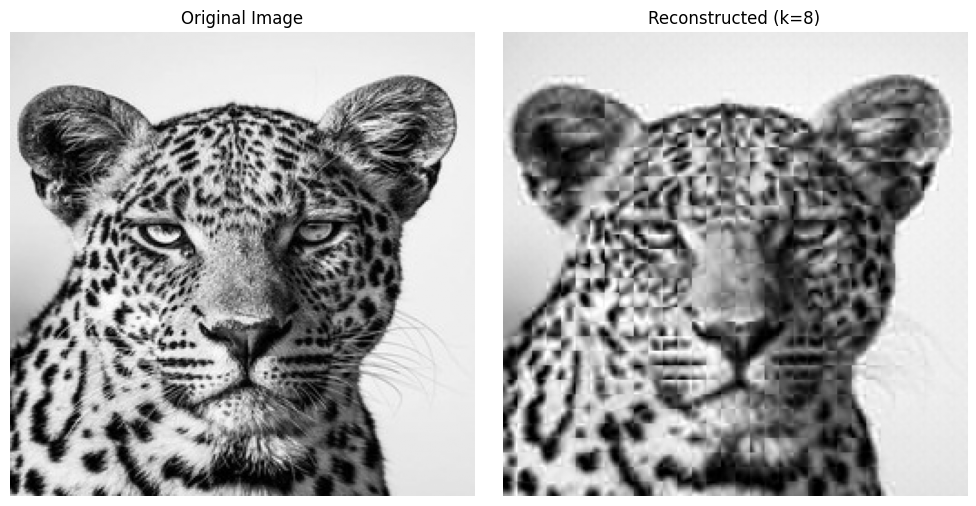

images/3.jpg MSE: 0.008876323534102736


In [7]:
# @title Generalization on other images
k=8
components = models[k].get_components()

other_images = ['images/1.jpg', 'images/2.jpg', 'images/3.jpg']

for path in other_images:
    img = load_image(path).astype(np.float32) / 255.0
    print(img.shape)
    blocks = blockify(img, 8, 8)
    flat_blocks = blocks.reshape(-1, 64)
    codes = encode_blocks(flat_blocks, mean_vector, components)
    recon = reconstruct_image(codes, mean_vector, components)
    show_original_vs_reconstructed(img, recon, k)
    print(f"{path} MSE: {np.mean((img - recon)**2)}")

In [8]:
components = models[8].get_components()
components[0]

array([-0.10912518, -0.11361813, -0.11774618, -0.12113892, -0.12405689,
       -0.12450778, -0.12298802, -0.11870714, -0.11156129, -0.11839469,
       -0.12317322, -0.12848588, -0.13081611, -0.12961051, -0.12744795,
       -0.12103396, -0.11523224, -0.12248088, -0.12908309, -0.13361462,
       -0.13397352, -0.13234638, -0.12847977, -0.12366704, -0.11831792,
       -0.12536894, -0.13083848, -0.13429041, -0.13583686, -0.13356605,
       -0.13068011, -0.12423577, -0.11955191, -0.12579643, -0.13133382,
       -0.13484399, -0.1355799 , -0.13402889, -0.13006377, -0.12393236,
       -0.12045512, -0.12567463, -0.13014258, -0.13224436, -0.1321419 ,
       -0.13030836, -0.12707331, -0.12127073, -0.11810247, -0.12270551,
       -0.12512921, -0.12777335, -0.12839231, -0.12656168, -0.12254738,
       -0.11594354, -0.11458228, -0.11817103, -0.12224176, -0.12561805,
       -0.12413009, -0.12126515, -0.1158784 , -0.11112651])

In [9]:
components[1]

array([-0.21526753, -0.20240858, -0.17294829, -0.12293103, -0.07306722,
       -0.02775578,  0.00747921,  0.03209358, -0.21922354, -0.19987811,
       -0.16380029, -0.10151554, -0.04673728, -0.00331727,  0.03214092,
        0.0593315 , -0.2113854 , -0.18441664, -0.13889447, -0.0759173 ,
       -0.02409513,  0.02247132,  0.06622334,  0.10389843, -0.18671994,
       -0.15744651, -0.11287351, -0.05026083,  0.00842863,  0.06047046,
        0.10982806,  0.1483813 , -0.15738233, -0.12251435, -0.07379127,
       -0.01033392,  0.04771276,  0.10179003,  0.1509007 ,  0.17367263,
       -0.11775017, -0.07919325, -0.03070145,  0.03075863,  0.0901657 ,
        0.13781736,  0.17566264,  0.19580103, -0.0698139 , -0.03692959,
        0.00764477,  0.06686997,  0.11823081,  0.16027329,  0.19336162,
        0.20989507, -0.03192098, -0.00163829,  0.03733705,  0.08730529,
        0.12903349,  0.16782435,  0.19353843,  0.20591678])